In [1]:
import numpy as np
import pandas as pd

import seaborn as sns  
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]#展示中文字体
mpl.rcParams["axes.unicode_minus"]=False#处理负刻度值



In [2]:
def draw_all(ax, df):
    index = pd.to_datetime(df.index)
    ax.plot(index, df["qty"], label='需求量')
    ax.plot(index, df["mean 5"], label='mean 5')
    ax.plot(index, df["std 5"], label='std 5')
    ax.plot(index, df["mean 15"], label='mean 15')
    ax.plot(index, df["std 15"], label='std 15')
    ax.plot(index, df["min 15"], label='min 15')
    ax.plot(index, df["max 15"], label='max 15')
    ax.plot(index, df["d mean 5"], label='d mean 5')
    
    
    # 设置x轴标签为日期格式
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=9))


# 数据处理

In [3]:
data_raw = pd.read_excel("data/附件1-商家历史出货量表.xlsx")

product_type_raw = pd.read_excel("data/附件2-商品信息表.xlsx")
storage_type_raw = pd.read_excel("data/附件4-仓库信息表.xlsx")
seller_type_raw = pd.read_excel("data/附件3-商家信息表.xlsx")
seller_type_raw.head()


,seller_no,seller_category,inventory_category,seller_level
0,seller_1,居家生活,B,New
1,seller_2,厨具,A,Large
2,seller_3,厨具,A,Large
3,seller_4,家居日用,A,Large
4,seller_5,家居日用,B,Large


In [4]:
data = data_raw.copy()
data["qty"] = data["qty"].where(data["qty"] <= 200, 200)
data.head()

,seller_no,product_no,warehouse_no,date,qty
0,seller_19,product_448,wh_30,2023-05-09,10
1,seller_19,product_448,wh_30,2023-04-17,14
2,seller_19,product_448,wh_30,2023-01-09,2
3,seller_19,product_448,wh_30,2023-01-20,1
4,seller_19,product_448,wh_30,2023-02-13,22


In [5]:
product_type = product_type_raw.set_index("product_no")
storage_type = storage_type_raw.drop_duplicates(keep='first').set_index("warehouse_no")
seller_type = seller_type_raw.set_index("seller_no")
seller_type["mixed type"] = seller_type["inventory_category"]+" "+seller_type["seller_level"]
seller_type

,seller_category,inventory_category,seller_level,mixed type
seller_no,,,,
seller_1,居家生活,B,New,B New
seller_2,厨具,A,Large,A Large
seller_3,厨具,A,Large,A Large
seller_4,家居日用,A,Large,A Large
seller_5,家居日用,B,Large,B Large
seller_6,玩具乐器,A,Medium,A Medium
seller_7,手机通讯,B,Large,B Large
seller_8,医疗保健,D,Large,D Large
seller_9,手机通讯,B,Medium,B Medium


# 特征构建

1. mean 5
2. mean 15
3. std 5
4. std 15
5. min
6. max
7. d mean 5
8. weekend

In [6]:
df = data[["product_no","warehouse_no","date","qty"]].groupby(["product_no","date"]).mean()
#df = df.loc["product_998"]

df["mean 5"] = df["qty"].rolling(window=5).mean().fillna(0)
df["std 5"] = df["qty"].rolling(window=5).std().fillna(0)
df["mean 15"] = df["qty"].rolling(window=15).mean().fillna(0)
df["std 15"] = df["qty"].rolling(window=15).std().fillna(0)
df["min 15"] = df["qty"].rolling(window=15).min().fillna(0)
df["max 15"] = df["qty"].rolling(window=15).max().fillna(0)
df["d mean 5"] = df["mean 5"].diff().fillna(0)
df["weekend"] = pd.to_datetime(df.index.get_level_values(1)).dayofweek.isin([5, 6])

df

qty     mean 5     std 5    mean 15     std 15  \
product_no   date                                                               
product_1001 2022-12-01  13.333333   0.000000  0.000000   0.000000   0.000000   
             2022-12-02  11.000000   0.000000  0.000000   0.000000   0.000000   
             2022-12-03  11.666667   0.000000  0.000000   0.000000   0.000000   
             2022-12-04   9.666667   0.000000  0.000000   0.000000   0.000000   
             2022-12-05   8.000000  10.733333  2.019351   0.000000   0.000000   
...                            ...        ...       ...        ...        ...   
product_998  2023-05-11  78.000000  71.400000  4.449719  69.000000  16.584201   
             2023-05-12  73.500000  72.600000  3.911521  70.966667  15.089574   
             2023-05-13  75.000000  72.900000  4.052777  72.966667  13.281925   
             2023-05-14  73.500000  74.100000  2.724885  74.233333  12.261826   
             2023-05-15  72.000000  74.400000  2.274863  75.133333  11.496066   

                         min 15  max 15   d mean 5  weekend  
product_no   date                                            
product_1001 2022-12-01     0.0     0.0   0.000000    False  
             2022-12-02     0.0     0.0   0.000000    False  
             2022-12-03     0.0     0.0   0.000000     True  
             2022-12-04     0.0     0.0   0.000000     True  
             2022-12-05     0.0     0.0  10.733333    False  
...                         ...     ...        ...      ...  
product_998  2023-05-11    44.0   101.0  -0.300000    False  
             2023-05-12    45.0   101.0   1.200000    False  
             2023-05-13    50.5   101.0   0.300000     True  
             2023-05-14    50.5   101.0   1.200000     True  
             2023-05-15    50.5   101.0   0.300000    False  

[201192 rows x 9 columns]

# 数据分类

- 根据商家体量分类

###  分类依据

1. 类型内平均相关率较高
2. 类型数量适合，训练效率较高

In [7]:
import random
def aver_corr(matrix):
    s = matrix.values.sum() - len(matrix)
    
    return s/len(matrix)/(len(matrix)-1)

$$
\overline {cor}=\frac{\sum_i^n\sum_j^n c_{ij} -n}{n(n-1)}
$$

In [8]:
product_seller = data.set_index("product_no")[["seller_no","date","qty"]]
product_seller["seller t"] = seller_type.loc[product_seller["seller_no"]]["mixed type"].values
product_seller.head()
#seller_type.loc[product_seller["seller_no"]]["mixed type"]

,seller_no,date,qty,seller t
product_no,,,,
product_448,seller_19,2023-05-09,10,C Large
product_448,seller_19,2023-04-17,14,C Large
product_448,seller_19,2023-01-09,2,C Large
product_448,seller_19,2023-01-20,1,C Large
product_448,seller_19,2023-02-13,22,C Large


In [9]:
count = 50

name = []
seller_corr = []

for idx, d in product_seller.groupby("seller t"):

    qtys = d.groupby(["product_no","date"]).mean()
    qtys = qtys.unstack(level=0).fillna(0)
    
    clist = qtys.columns.tolist()
    rand_colm = random.sample(clist, min(count, len(clist)))
    
    name += [idx]
    seller_corr += [aver_corr(qtys[rand_colm].corr())]

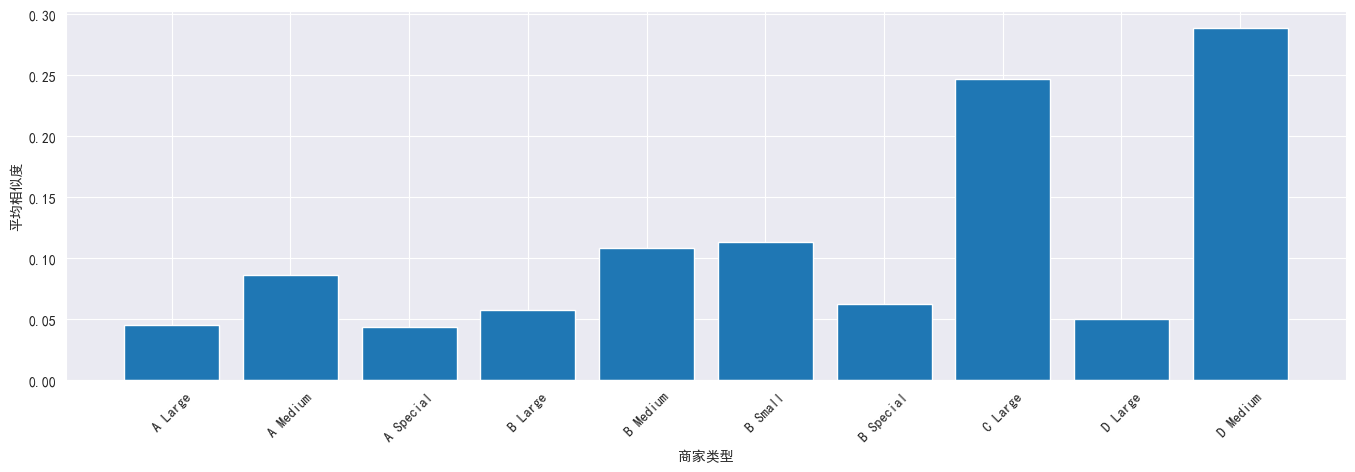

In [10]:
plt.bar(name, seller_corr)

plt.xticks(rotation=45)

plt.ylabel('平均相似度')
plt.xlabel('商家类型')

plt.subplots_adjust(left=0, right=2)
plt.show()

## 数据划分+自动预测

In [11]:
# 数据集划分，自定义窗口大小和数据量

product_num = 1000
ratio = 0.8

WINDOW = 10
FEATURES = 9

from numpy.lib.stride_tricks import sliding_window_view
def split_data(raw, window, num=product_num):
    
    index = raw.index.get_level_values(0).unique()
    print(len(index))
    num = min(num, len(index))
    
    def choice(index, count):
        index = np.random.choice(index, count, replace=False)
        return index
    
    prod_choice = choice(index, num)
    data = raw.loc[prod_choice]
    print(data.head())
    data = data.to_numpy()
    print(data.shape)
    
    x = sliding_window_view(data, window_shape=(window,FEATURES)).squeeze(1)[:-1].reshape((-1, window*FEATURES)) 
    y = data.T[0, window:]
    
    train_count = int(ratio * len(y))
    
    return x[:train_count], y[:train_count], x[train_count:], y[train_count:]

In [12]:
# 滑动窗口预测

def LongTerm(model, step, data_x, first_day=0):
    
    root = data_x.reshape(-1, WINDOW, FEATURES).squeeze(0)

    for i in range(step):
        predict_window = root[-WINDOW:]
        series = root.T[0][-WINDOW:]
        
        predict = model.predict(predict_window.reshape(1, WINDOW*FEATURES))[0]
        predict = max(min(predict, 200), 0)
        series = np.append(series, predict)
        
        mean_5 = series[-5:].mean()
        std_5 = series[-5:].std()
        mean_15 = series[-15:].mean()
        std_15 = series[-15:].std()
        min_15 = series[-15:].min()
        max_15 = series[-15:].max()
        
        d_mean_5 = mean_5 - predict_window.T[1][-1]
        weekend = first_day%7 in [5,6] 
        
        new_col = [predict, mean_5, std_5, mean_15, std_15, min_15, max_15, d_mean_5, weekend]
        #print(new_col)
        
        root = np.append(root, [new_col], axis = 0)
        
    return root.T

In [13]:
# 1-wmape 打分

def WmapeScore(predict, gt):
    gt_sum = gt.sum()
    err_sum = np.abs(predict-gt).sum()
    
    return 1 - err_sum/gt_sum

In [14]:
# 训练单元

class TrainingUnit:
    
    def __init__(self, data, window, num, model):
        
        self.train_x, self.train_y, self.test_x, self.test_y = split_data(data, window, num)
        self.model = model
        
        self.window = window
        
    def train(self):
        
        self.model.fit(self.train_x, self.train_y)
        
    def evalueate_single(self, type_name=None, show_graph=True):
        
        predict = self.model.predict(self.test_x)
        
        if show_graph:
            plt.plot(self.test_y[:300], label='真实值')
            plt.plot(predict[:300],     label='预测值')
            plt.legend()
            plt.xlabel('日期')
            plt.ylabel('需求量' if type_name is None else type_name+"型商家需求量")
            
            plt.subplots_adjust(left=0, right=2)
            plt.show()
        
        mse = np.mean((self.test_y - predict) ** 2)
        print("MSE:",mse)
        print("MIN:",np.mean(np.diff(self.test_y)**2))
        
        return predict, mse
        
    def long_term_predict(self, step, root=None, first_day=0):
        if root is None:
            root = self.test_x[self.window:][0]
            
        result = LongTerm(self.model, step, root, first_day)
        
        return result, root
    
    def evalueate(self, step, predict, real):        
        w_score = WmapeScore(predict[0][self.window:], real[self.window:self.window+step])
        
        return w_score
    
    def evalueate_long(self, step, times=1):
        w_scores = []
        for i in range(1):
            offset = np.random.randint(0, len(self.test_x)-self.window*5)
            root = self.test_x[offset+self.window:][0]
            predict, _ = self.long_term_predict(step, root)
            
            w_score = self.evalueate(step, predict, self.test_y[offset:])
            w_scores += [w_score]
            
        return np.mean(w_scores)
        
    def show_long(self, result, root, step=15, type_name=None):
        
        plt.plot(root[:self.window+step], label="GT")
        plt.plot(result[0], label="Predict")
        plt.legend()
        
        plt.subplots_adjust(left=0, right=2)
        plt.show()

In [15]:
def TrainingProcess(table):

    count = 0
    for t, unit in table.items():
        unit.train()
        count+=1
        print(f"微调：{count}/{len(table)}")
        
    for t, unit in table.items():
        unit.evalueate_single(t, True)
        
    step = 30
    for t, unit in table.items():
        predict, _ = unit.long_term_predict(step)
        unit.show_long(predict, unit.test_y)
        
    for t, unit in table.items():
        score = unit.evalueate_long(15, 30)
        print(t, score)


# 自主训练 

In [16]:
product_seller.head()

,seller_no,date,qty,seller t
product_no,,,,
product_448,seller_19,2023-05-09,10,C Large
product_448,seller_19,2023-04-17,14,C Large
product_448,seller_19,2023-01-09,2,C Large
product_448,seller_19,2023-01-20,1,C Large
product_448,seller_19,2023-02-13,22,C Large


In [17]:
types = product_seller["seller t"].unique()
types

array(['C Large', 'A Large', 'B Large', 'B Medium', 'D Large', 'D Medium',
       'B Small', 'B Special', 'A Special', 'A Medium'], dtype=object)

In [18]:
seller_data = product_seller["seller t"].reset_index().set_index("seller t").drop_duplicates(keep='first')
seller_data

,product_no
seller t,
C Large,product_448
A Large,product_148
A Large,product_132
A Large,product_170
A Large,product_184
...,...
B Large,product_882
B Special,product_1907
D Large,product_211


In [19]:
seller_data.reset_index().groupby("seller t").count()

,product_no
seller t,
A Large,417
A Medium,19
A Special,9
B Large,481
B Medium,42
B Small,28
B Special,51
C Large,7
D Large,137


## 线性回归

In [20]:
from sklearn.linear_model import LinearRegression
import copy

pre_train = LinearRegression()

In [21]:
train_x, train_y, _, _ = split_data(df, WINDOW)
pre_train.fit(train_x, train_y)

1212
                         qty  mean 5     std 5   mean 15    std 15  min 15  \
product_no   date                                                            
product_1004 2022-12-01  1.5     2.4  1.294218  2.233333  0.863272     1.0   
             2022-12-02  2.0     2.4  1.294218  2.233333  0.863272     1.0   
             2022-12-03  1.0     1.8  1.036822  2.133333  0.915475     1.0   
             2022-12-04  1.0     1.3  0.447214  2.066667  0.961150     1.0   
             2022-12-05  2.5     1.6  0.651920  2.133333  0.953690     1.0   

                         max 15  d mean 5  weekend  
product_no   date                                   
product_1004 2022-12-01     4.0      -0.1    False  
             2022-12-02     4.0       0.0    False  
             2022-12-03     4.0      -0.6     True  
             2022-12-04     4.0      -0.5     True  
             2022-12-05     4.0       0.3    False  
(166000, 9)


LinearRegression()

In [22]:
LinearTrainingTable = dict()

for t in types:
    prods = seller_data.loc[t].values.squeeze()
    
    train_data = df.loc[prods]
    num = 1000
    model = copy.deepcopy(pre_train)

    LinearTrainingTable[t] = TrainingUnit(train_data, WINDOW, num, model)
    

7
                             qty    mean 5     std 5   mean 15    std 15  \
product_no  date                                                           
product_423 2022-12-01  1.333333  6.866667  4.213734  8.888889  5.075097   
            2022-12-02  4.666667  5.400000  3.112698  8.466667  5.149819   
            2022-12-03  2.000000  4.200000  3.014778  7.866667  5.353830   
            2022-12-04  1.000000  3.600000  3.344980  7.466667  5.639712   
            2022-12-05  2.000000  2.200000  1.445299  7.333333  5.750086   

                          min 15  max 15  d mean 5  weekend  
product_no  date                                             
product_423 2022-12-01  1.333333    22.0 -0.933333    False  
            2022-12-02  1.333333    22.0 -1.466667    False  
            2022-12-03  1.333333    22.0 -1.200000     True  
            2022-12-04  1.000000    22.0 -0.600000     True  
            2022-12-05  1.000000    22.0 -1.400000    False  
(1162, 9)
417
                 

In [23]:
# 微调

for t, unit in LinearTrainingTable.items():
    unit.train()

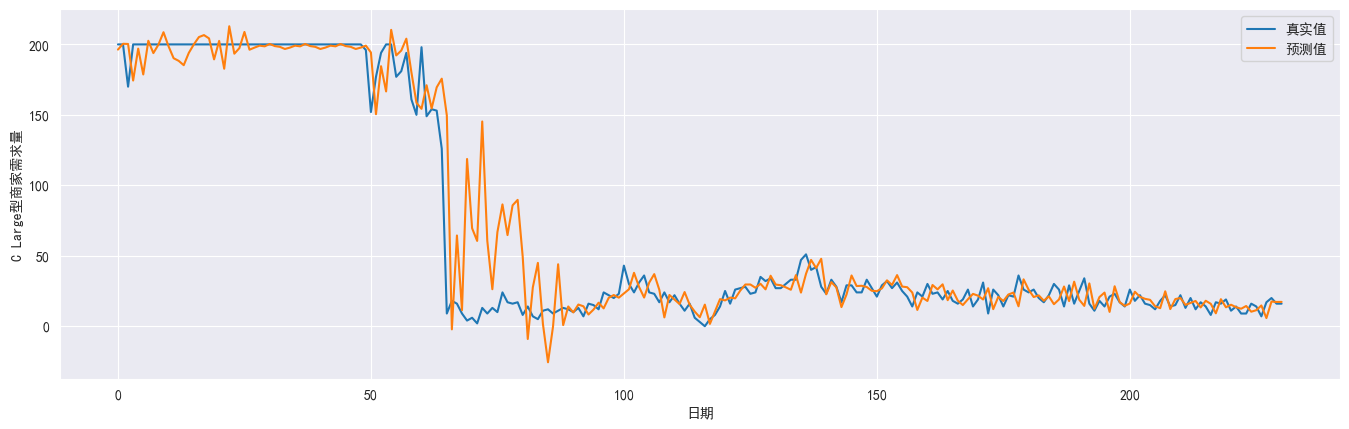

MSE: 485.90156720765964
MIN: 149.87826086956522


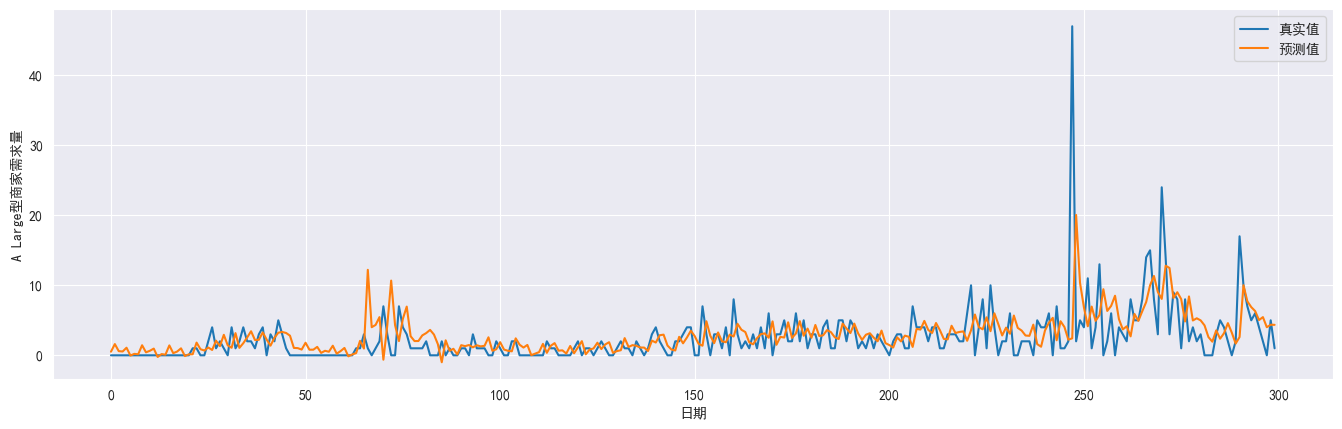

MSE: 130.89748856575522
MIN: 189.83841504920602


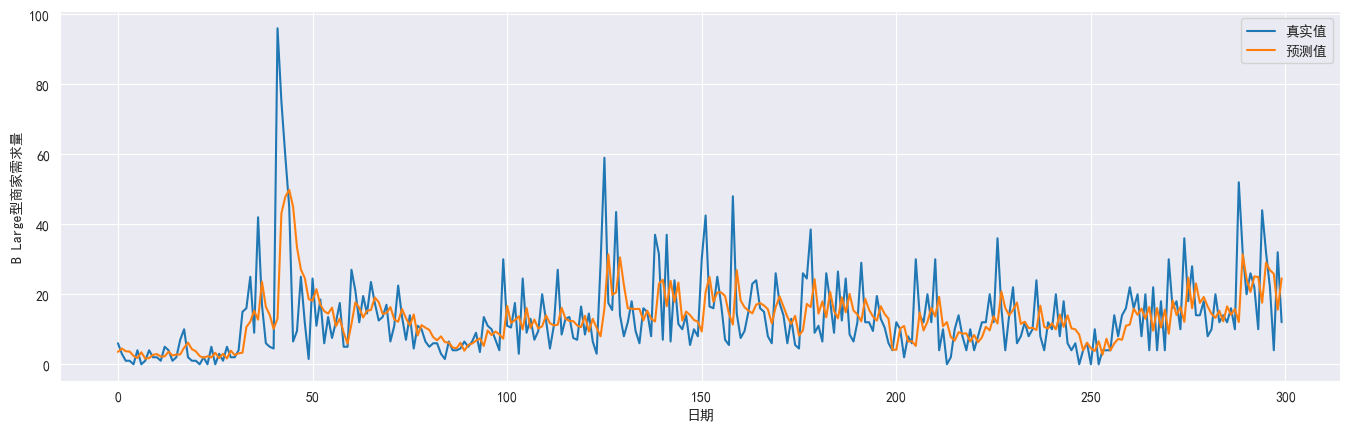

MSE: 113.03752047573941
MIN: 150.46410043631812


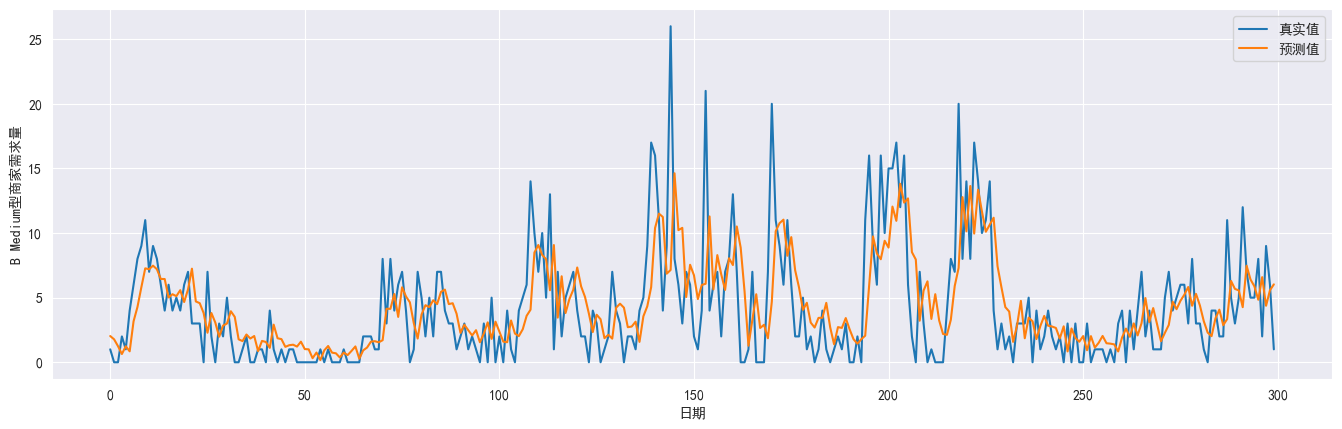

MSE: 13.858002990164257
MIN: 18.41235632183908


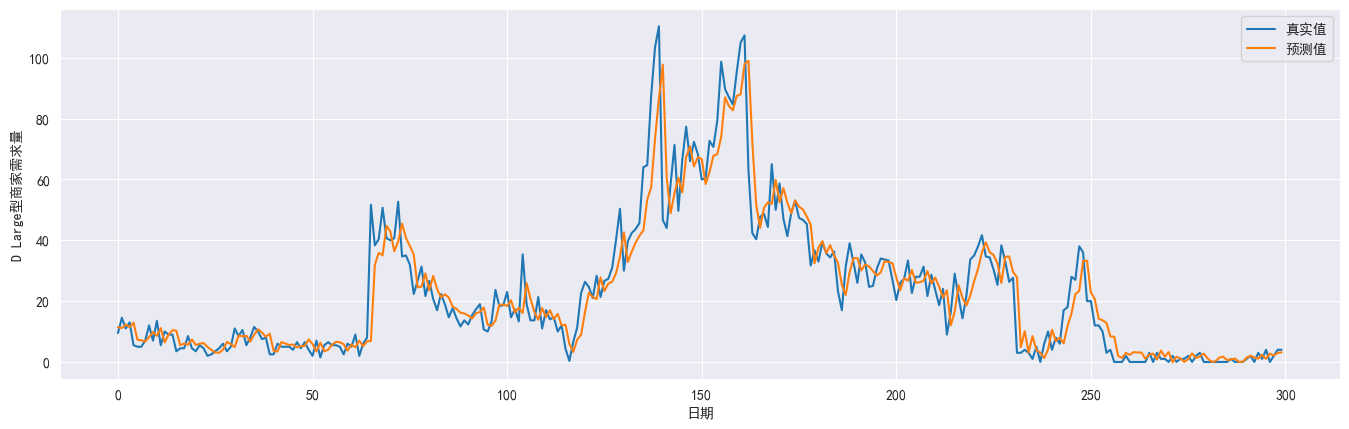

MSE: 93.66187076495241
MIN: 96.49810272767269


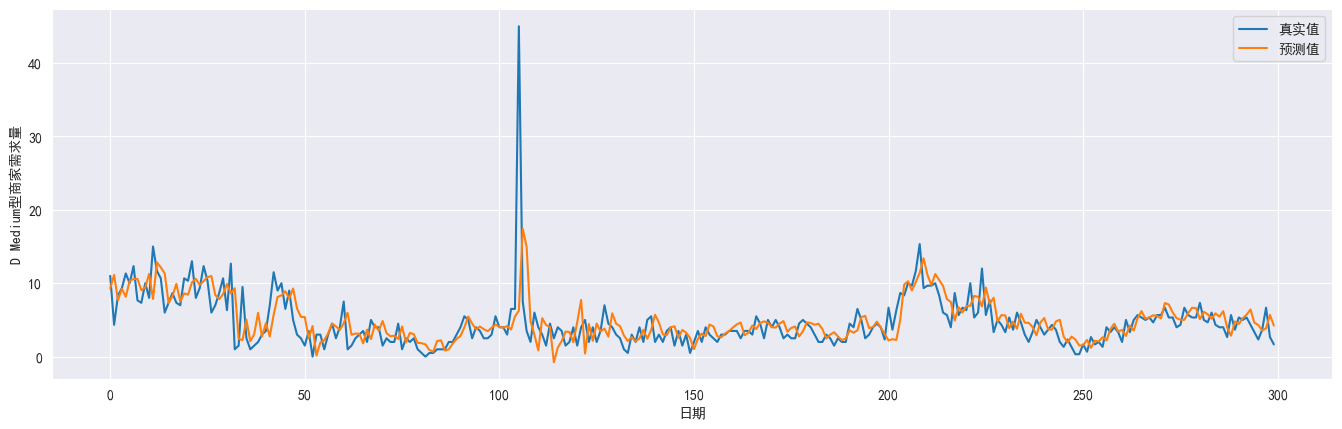

MSE: 63.550466521260226
MIN: 84.73868904876097


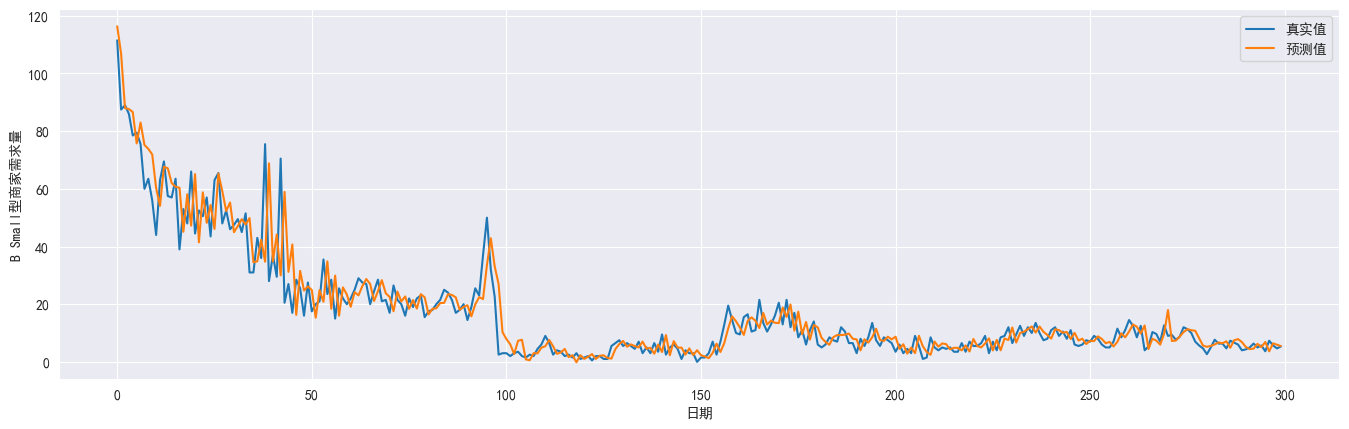

MSE: 151.20196042328908
MIN: 143.77870670022767


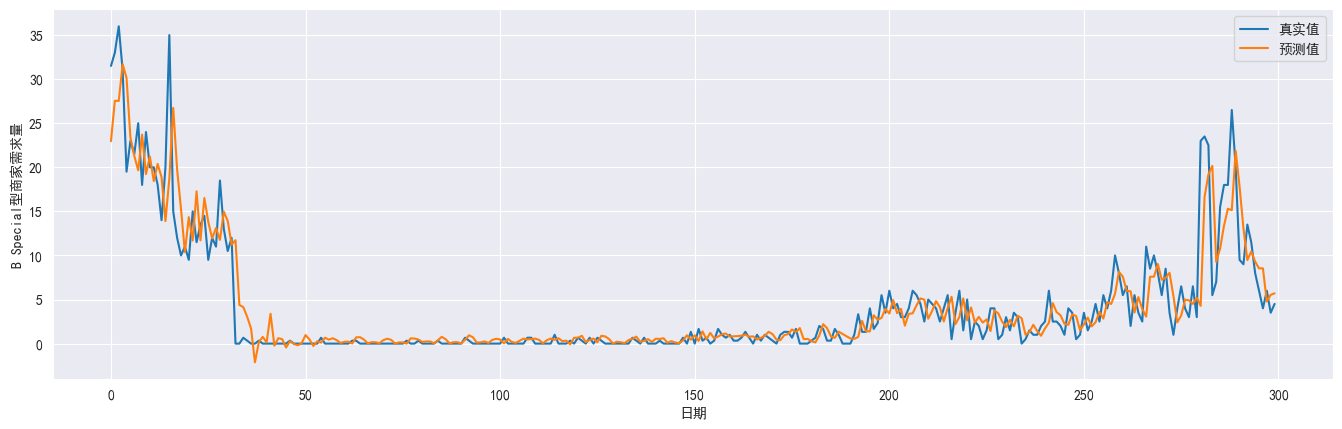

MSE: 219.26002048240898
MIN: 195.97705171167618


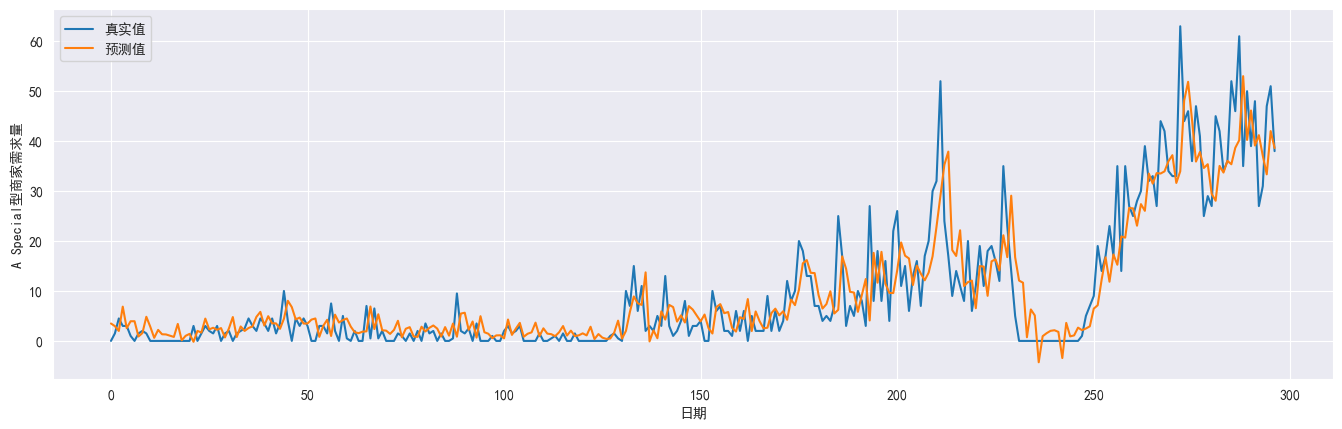

MSE: 38.948623974693575
MIN: 49.57432432432432


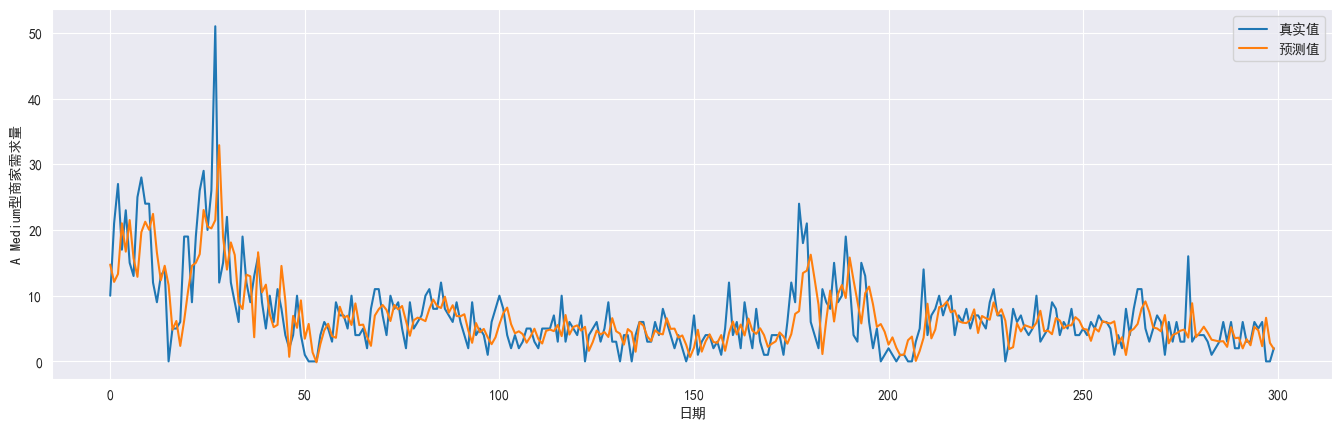

MSE: 16.313930533297636
MIN: 21.238853503184714


In [24]:
for t, unit in LinearTrainingTable.items():
    unit.evalueate_single(t)

### 长期预测

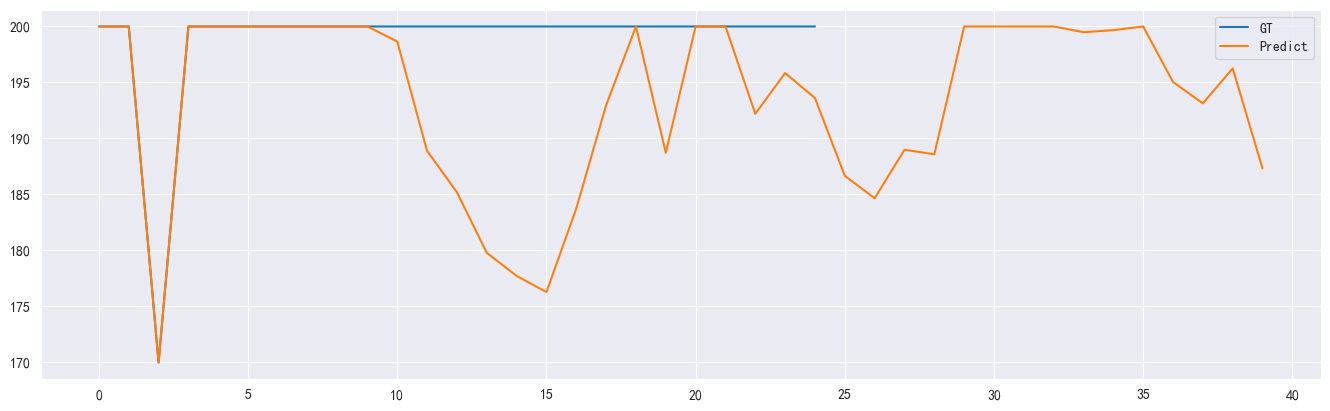

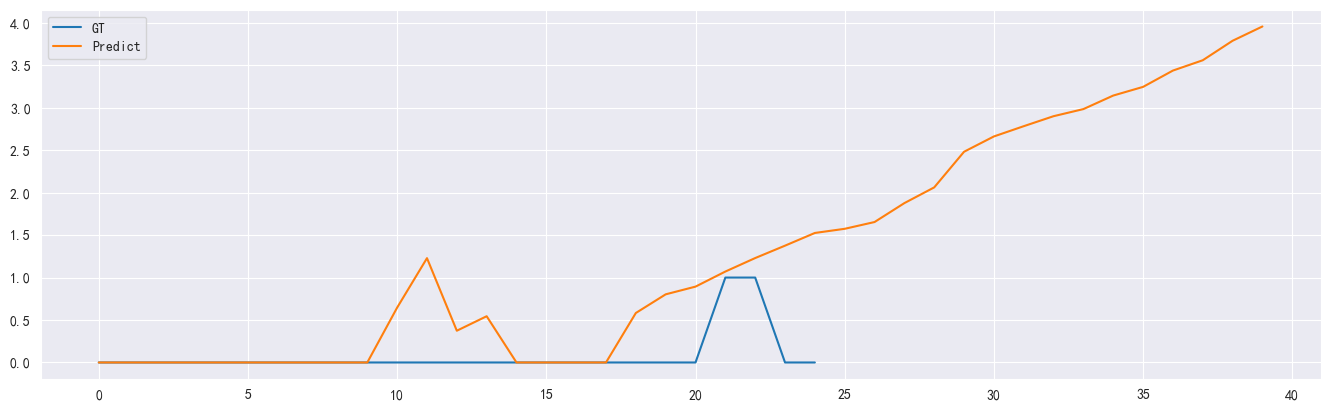

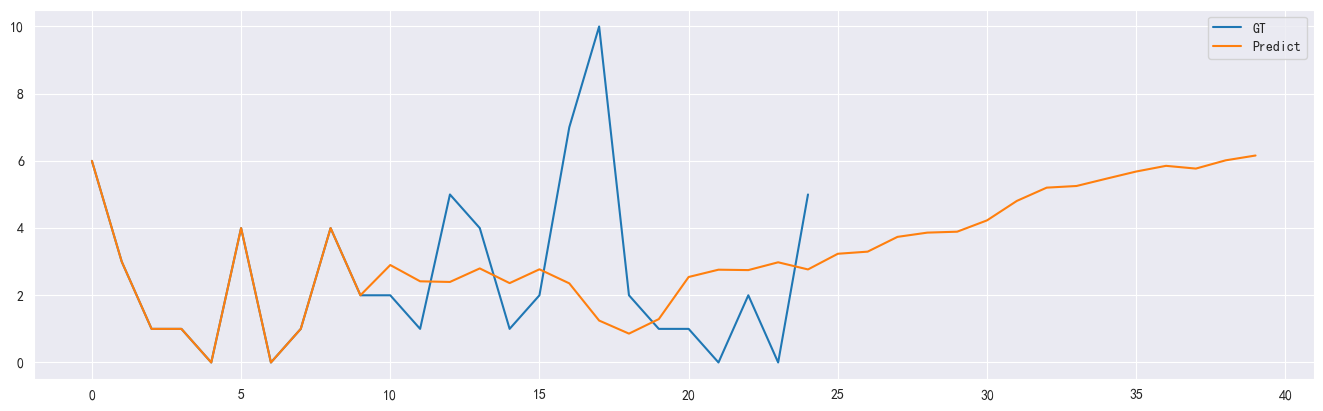

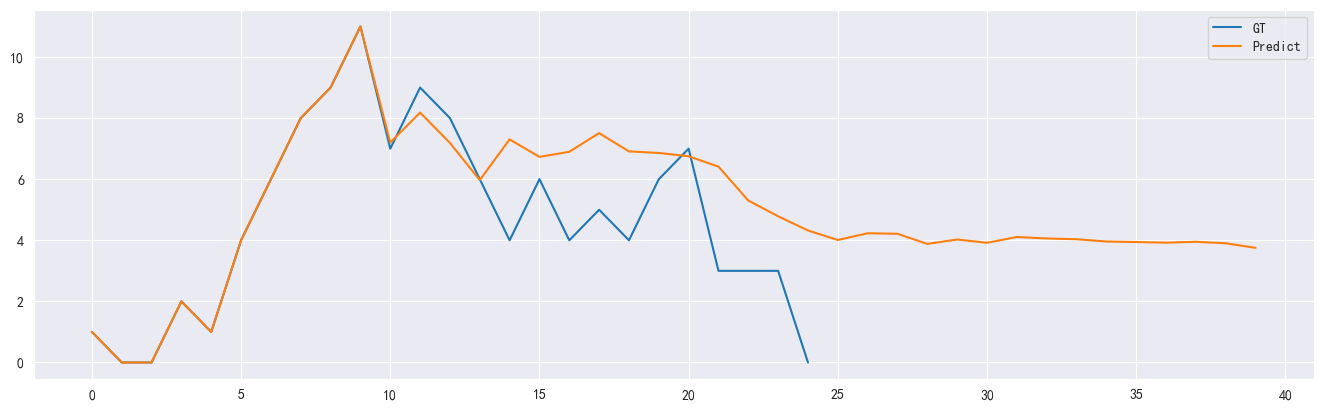

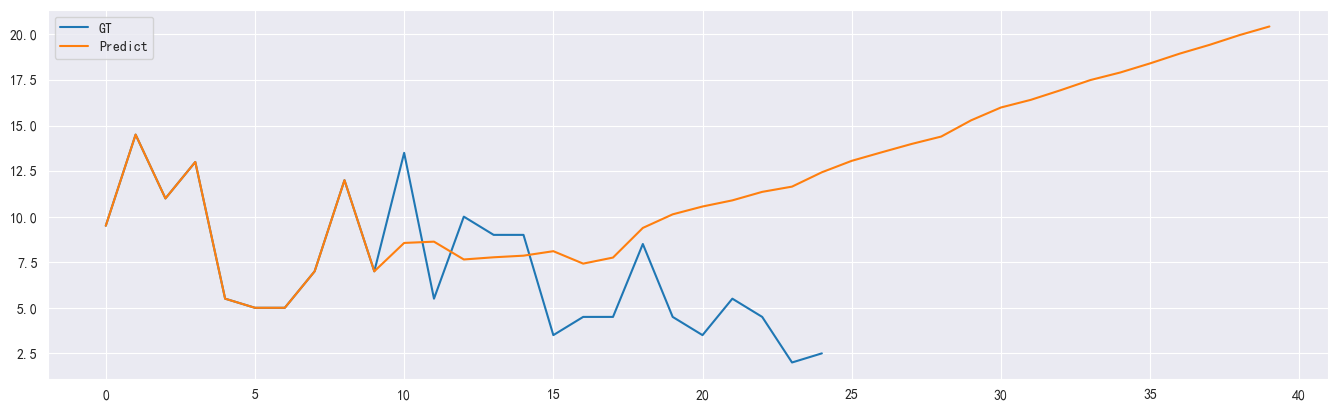

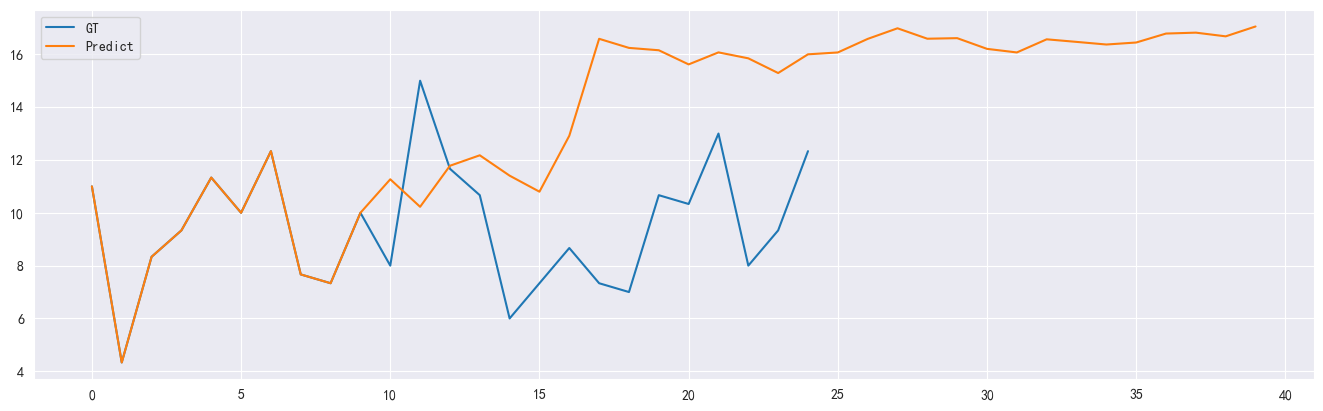

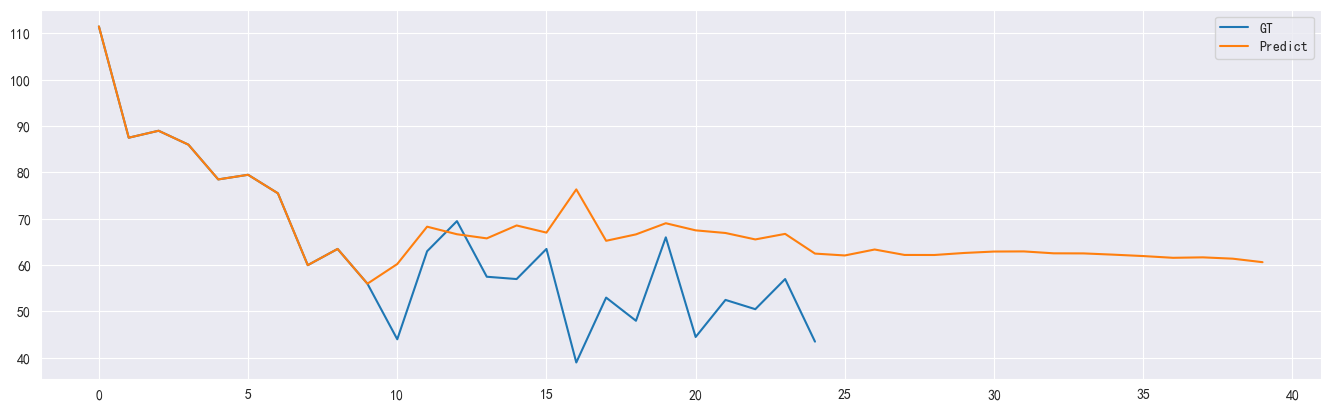

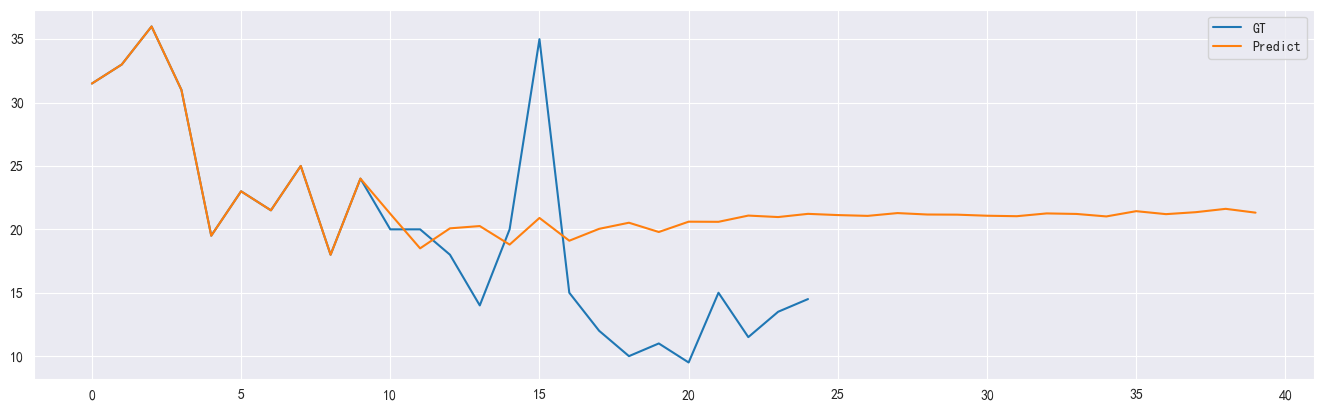

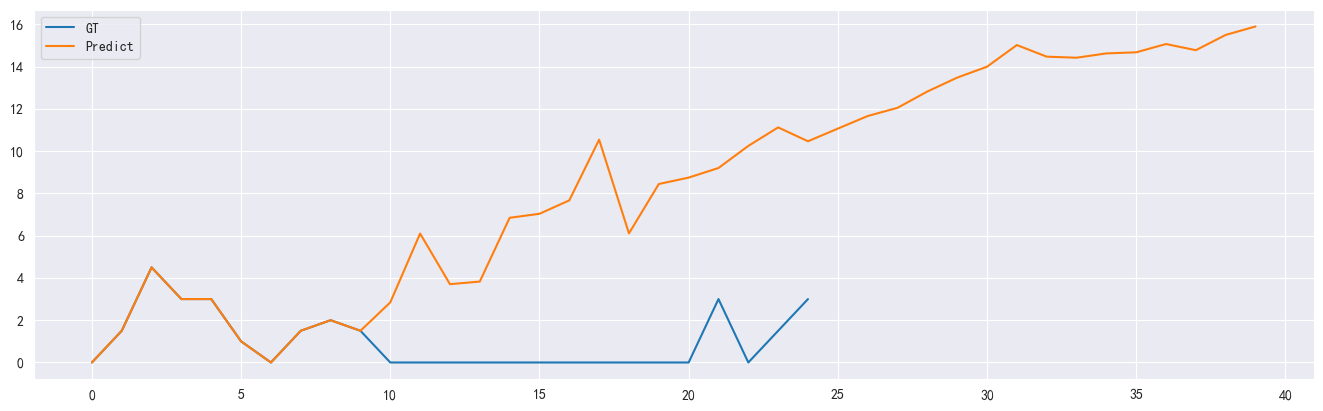

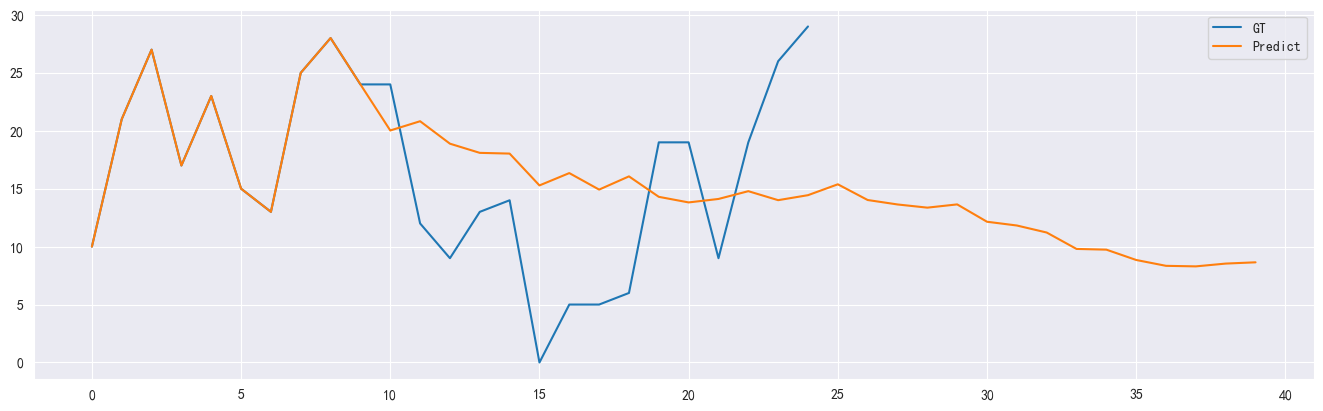

In [25]:
step = 30

for t, unit in LinearTrainingTable.items():
    predict, _ = unit.long_term_predict(step)
    unit.show_long(predict, unit.test_y)
    

In [26]:
for t, unit in LinearTrainingTable.items():
    score = unit.evalueate_long(15, 30)
    print(t, score)

C Large 0.5446815625196488
A Large -0.06995330995542548
B Large 0.3994429397053735
B Medium -0.7360123777922638
D Large 0.7924676608875
D Medium 0.24571787427457992
B Small 0.7177695418422023
B Special -43.58925853345349
A Special 0.6029456830258753
A Medium 0.5157904869104897


## 随机森林

In [27]:
from sklearn.ensemble import RandomForestRegressor

RF_pretrain = RandomForestRegressor(n_estimators= 50, random_state=81)

In [28]:
train_x, train_y, _, _ = split_data(df, WINDOW,  25)
RF_pretrain.fit(train_x, train_y)

1212
                         qty  mean 5     std 5   mean 15    std 15  min 15  \
product_no   date                                                            
product_1495 2022-12-01  4.0     4.2  3.346640  4.600000  2.947154     0.0   
             2022-12-02  8.0     5.4  3.435113  4.733333  3.058166     0.0   
             2022-12-03  7.0     6.4  2.880972  4.733333  3.058166     0.0   
             2022-12-04  6.0     7.0  2.236068  4.733333  3.058166     0.0   
             2022-12-05  6.0     6.2  1.483240  4.466667  2.722044     0.0   

                         max 15  d mean 5  weekend  
product_no   date                                   
product_1495 2022-12-01    10.0       0.4    False  
             2022-12-02    10.0       1.2    False  
             2022-12-03    10.0       1.0     True  
             2022-12-04    10.0       0.6     True  
             2022-12-05    10.0      -0.8    False  
(4150, 9)


RandomForestRegressor(n_estimators=50, random_state=81)

In [29]:
ForestTrainingTable = dict()

for t in types:
    prods = seller_data.loc[t].values.squeeze()
    
    train_data = df.loc[prods]
    num = 10
    model = copy.deepcopy(RF_pretrain)

    ForestTrainingTable[t] = TrainingUnit(train_data, WINDOW, num, model)

7
                         qty  mean 5     std 5   mean 15    std 15  min 15  \
product_no  date                                                             
product_443 2022-12-01  16.0     5.0  6.244998  4.200000  4.570089     0.0   
            2022-12-02  14.0     7.4  7.056912  5.066667  5.119524     0.0   
            2022-12-03  19.0    10.8  7.854935  6.200000  6.166731     0.0   
            2022-12-04  10.0    12.6  5.813777  6.866667  5.986493     0.0   
            2022-12-05  30.0    17.8  7.563068  8.866667  8.149204     1.0   

                        max 15  d mean 5  weekend  
product_no  date                                   
product_443 2022-12-01    16.0       1.8    False  
            2022-12-02    16.0       2.4    False  
            2022-12-03    19.0       3.4     True  
            2022-12-04    19.0       1.8     True  
            2022-12-05    30.0       5.2    False  
(1162, 9)
417
                         qty  mean 5     std 5   mean 15    std 15  min 1

微调：1/10
微调：2/10
微调：3/10
微调：4/10
微调：5/10
微调：6/10
微调：7/10
微调：8/10
微调：9/10
微调：10/10


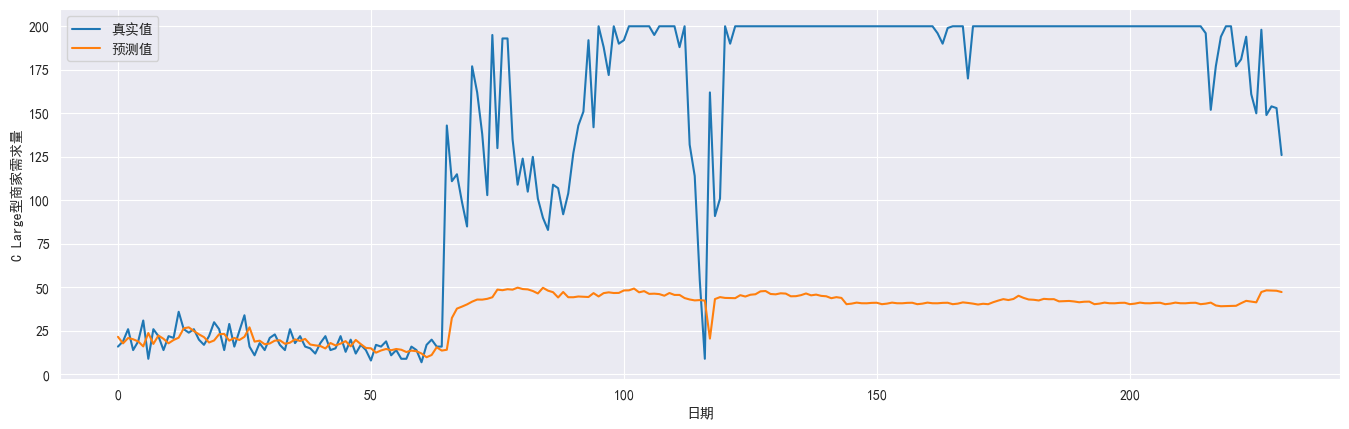

MSE: 14375.259434583939
MIN: 552.6869565217391


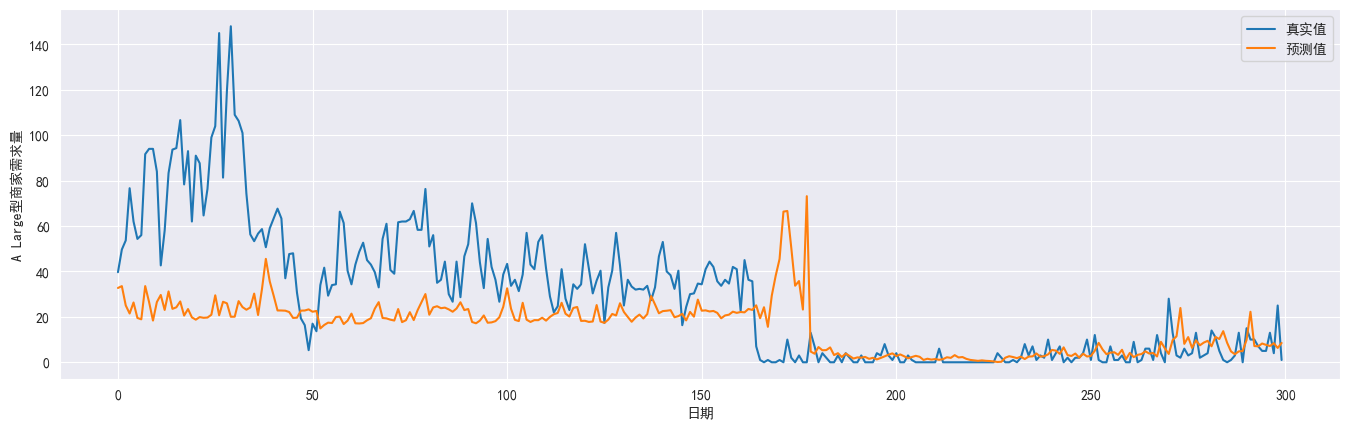

MSE: 759.2421942087544
MIN: 136.806484295846


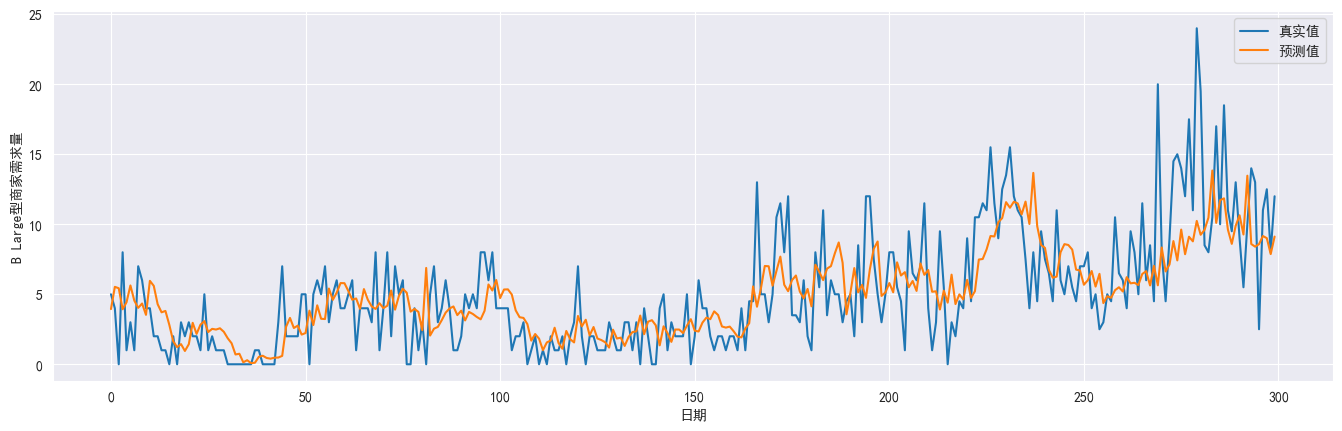

MSE: 10.166987878787879
MIN: 14.085866261398177


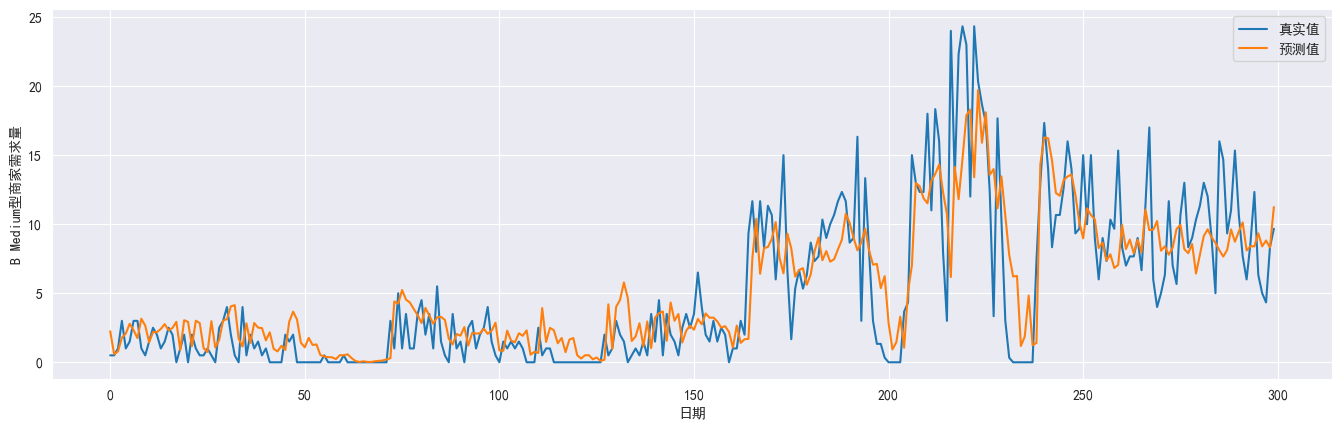

MSE: 10.602107643097643
MIN: 13.52997298210064


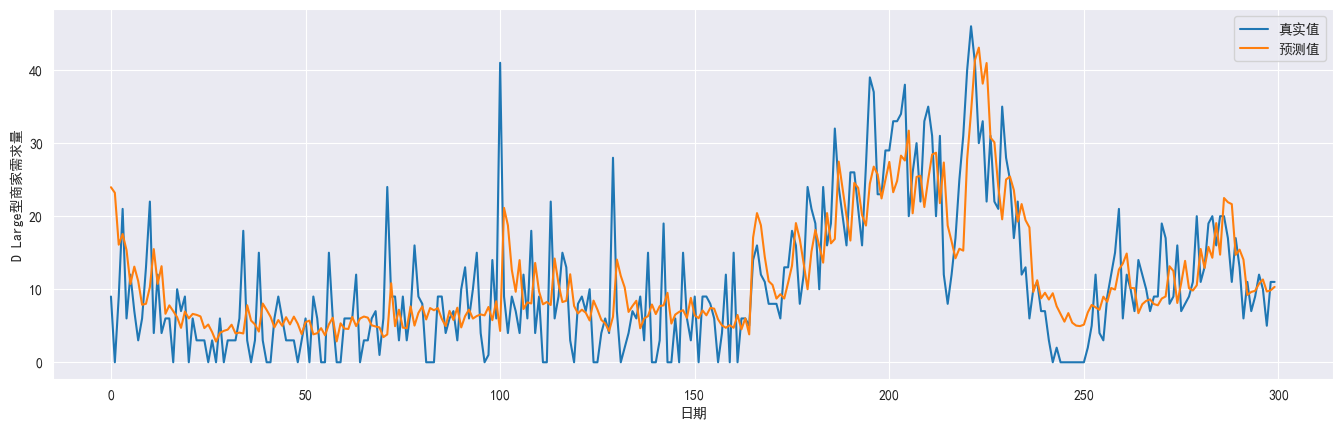

MSE: 44.540307946127925
MIN: 55.869300911854104


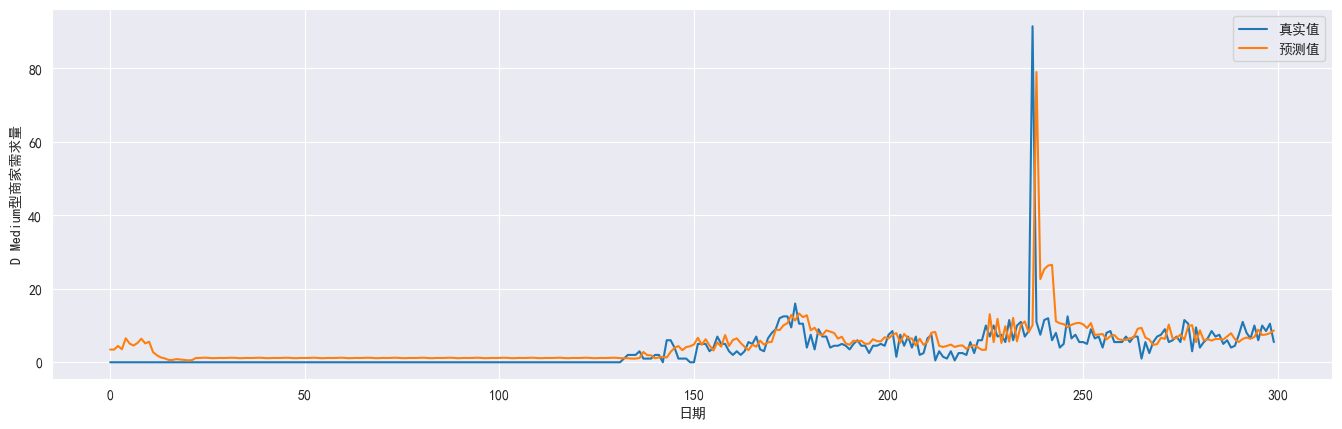

MSE: 43.9610584848485
MIN: 46.1709726443769


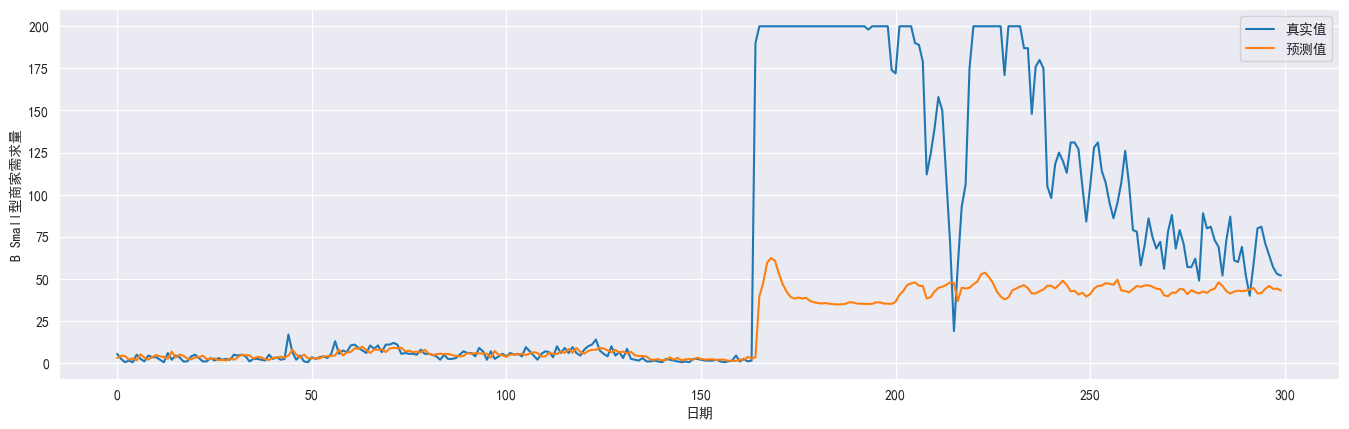

MSE: 5264.6961528619495
MIN: 257.5585106382979


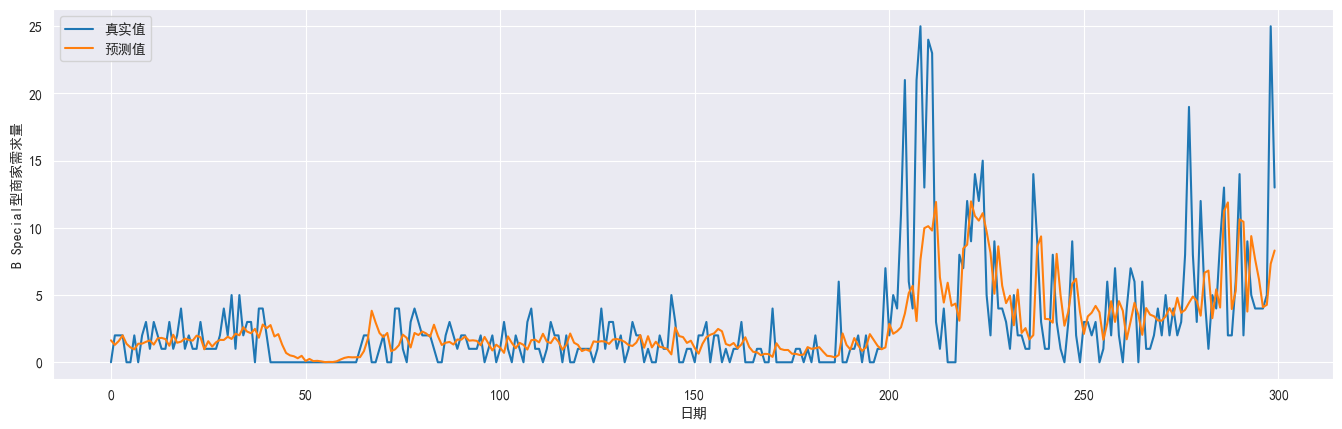

MSE: 12.075061031649824
MIN: 15.267477203647417


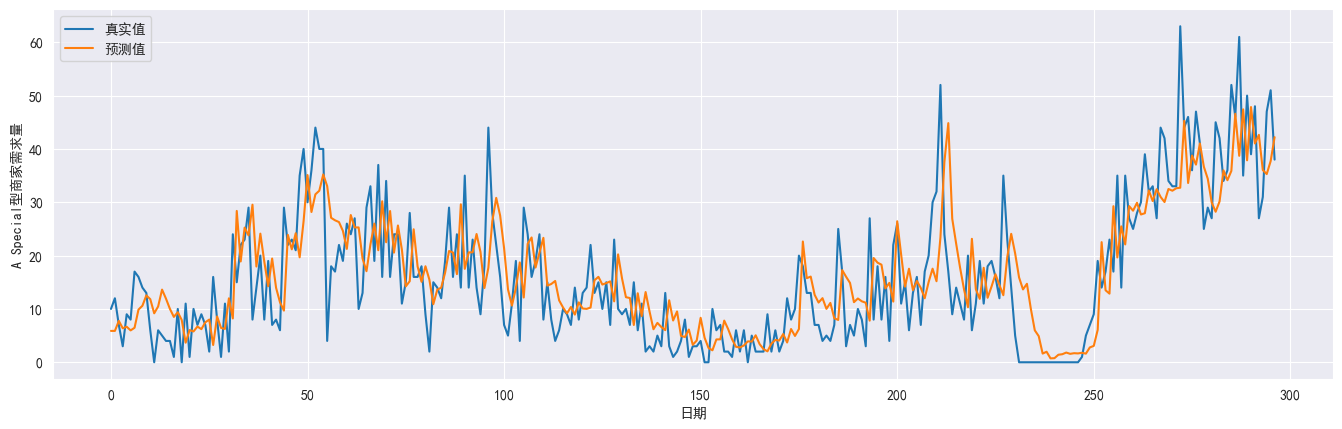

MSE: 80.17053277216606
MIN: 92.33108108108108


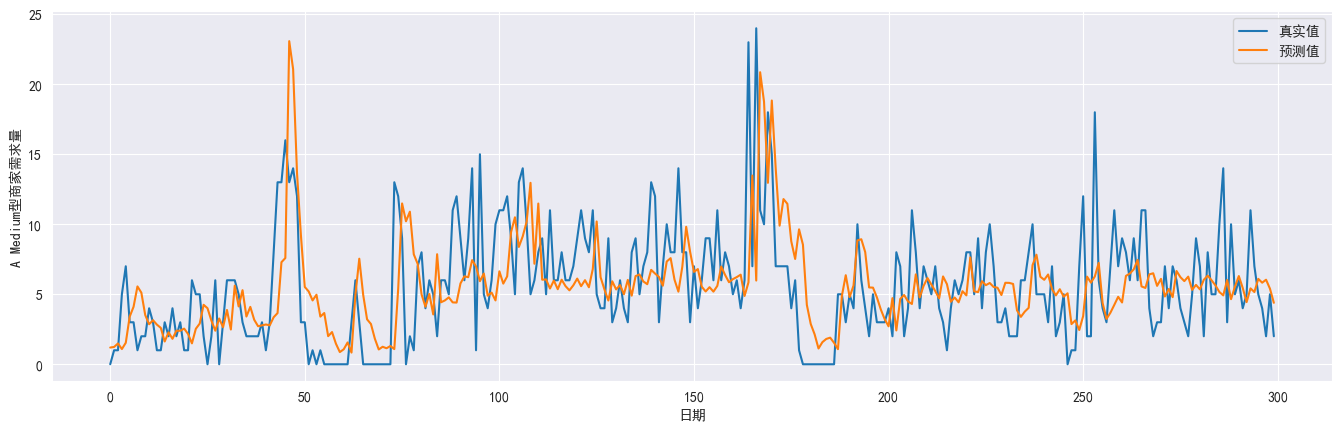

MSE: 14.72647824915825
MIN: 15.98176291793313


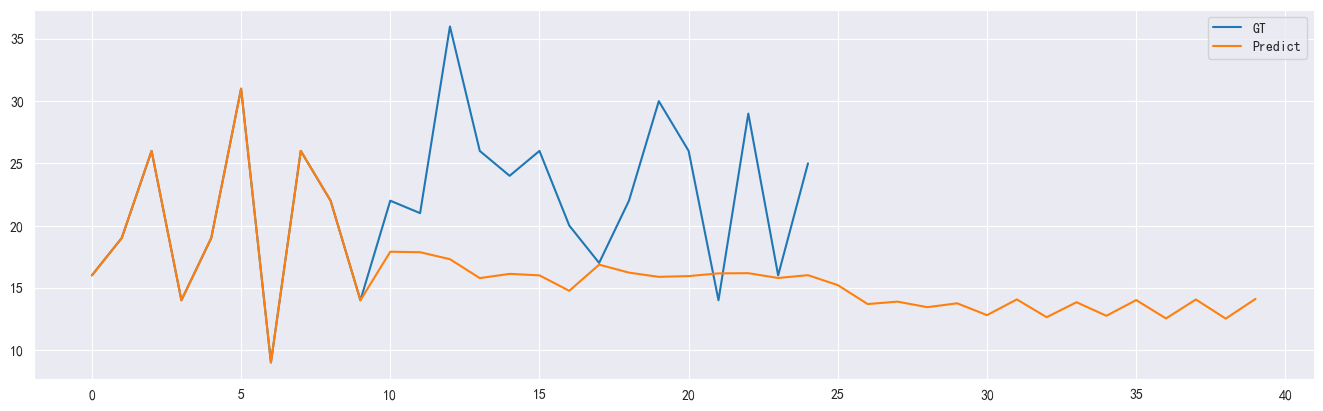

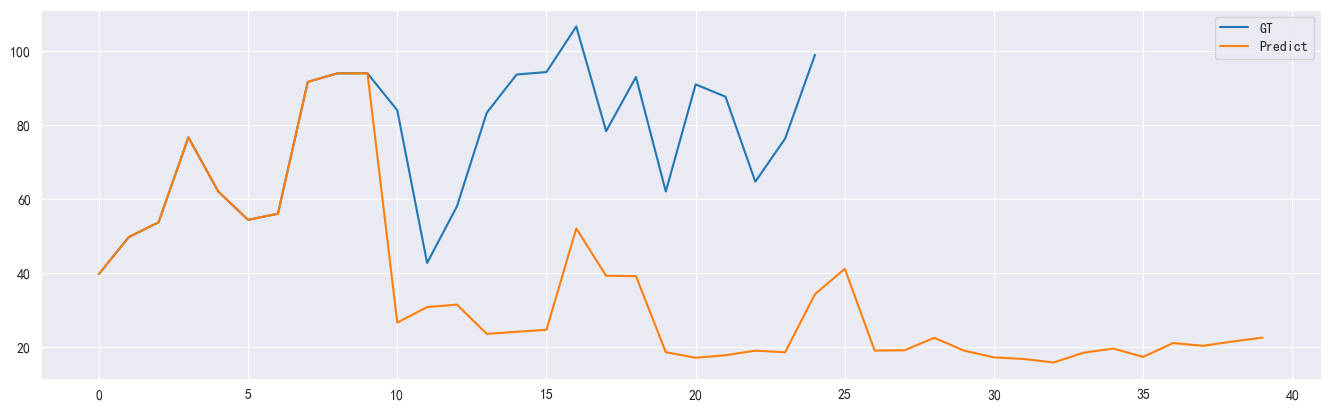

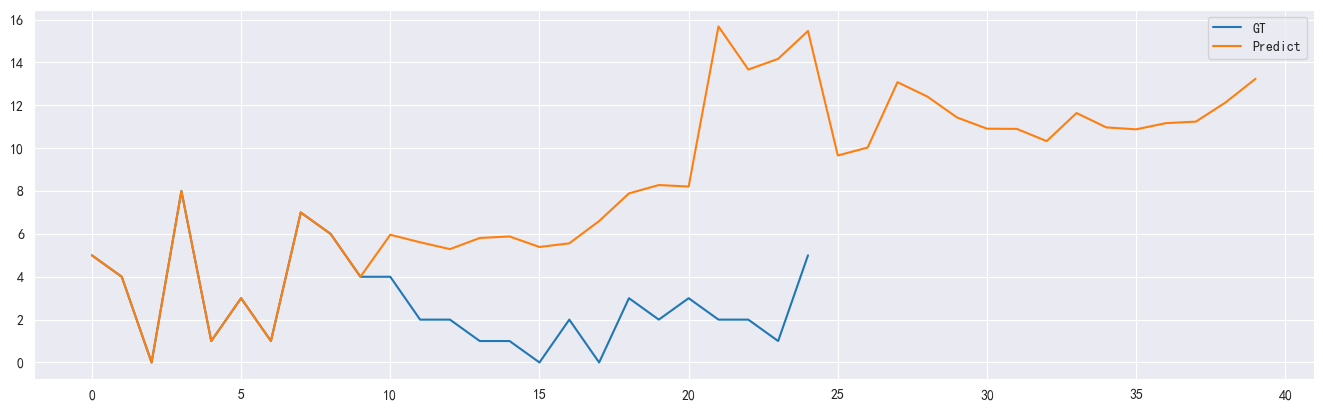

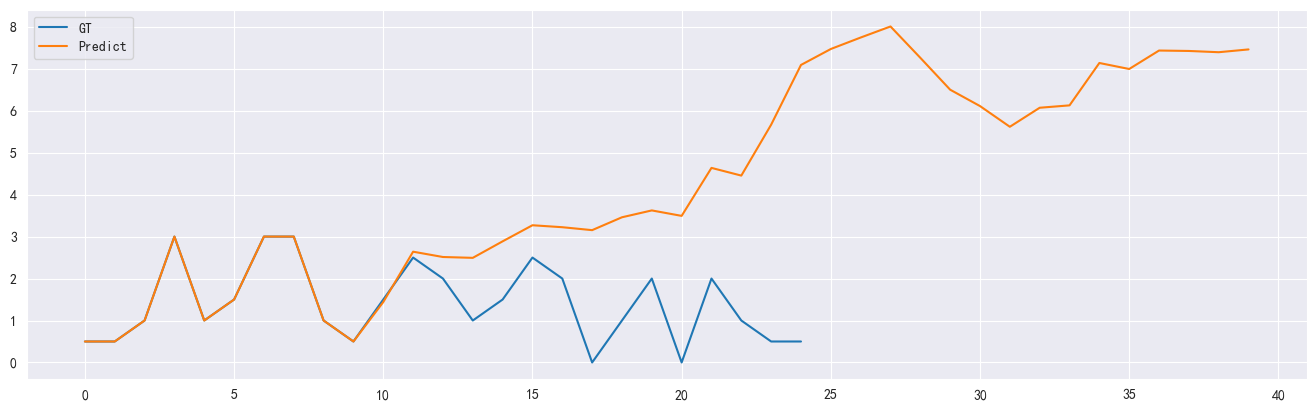

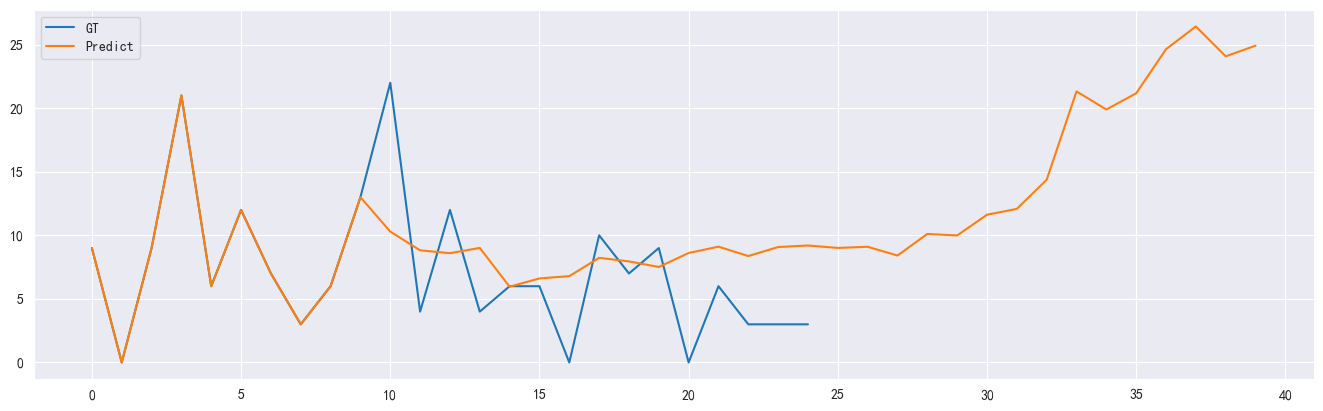

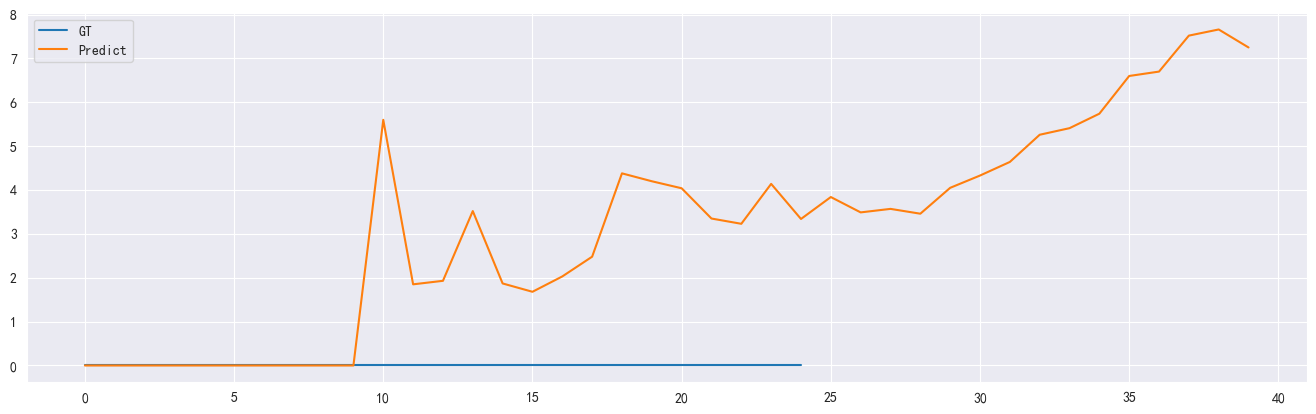

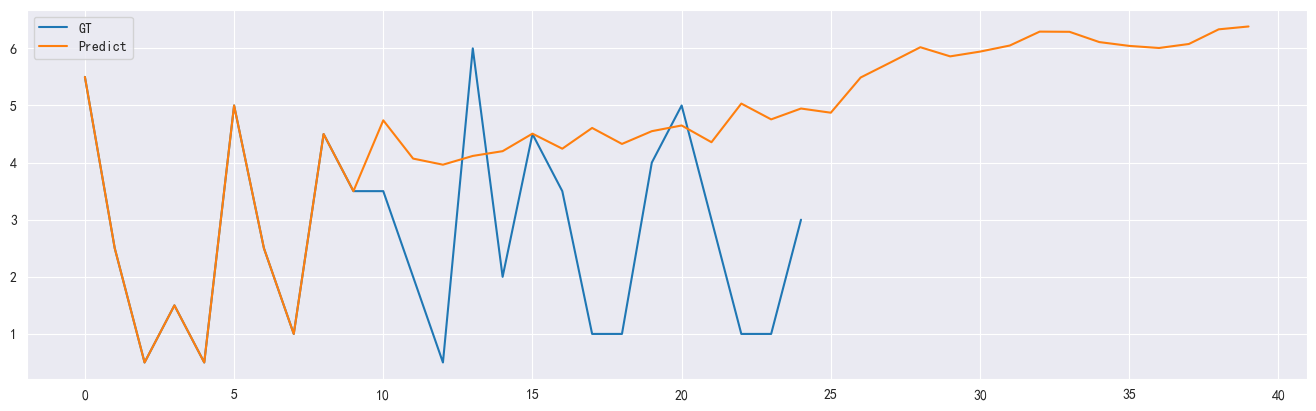

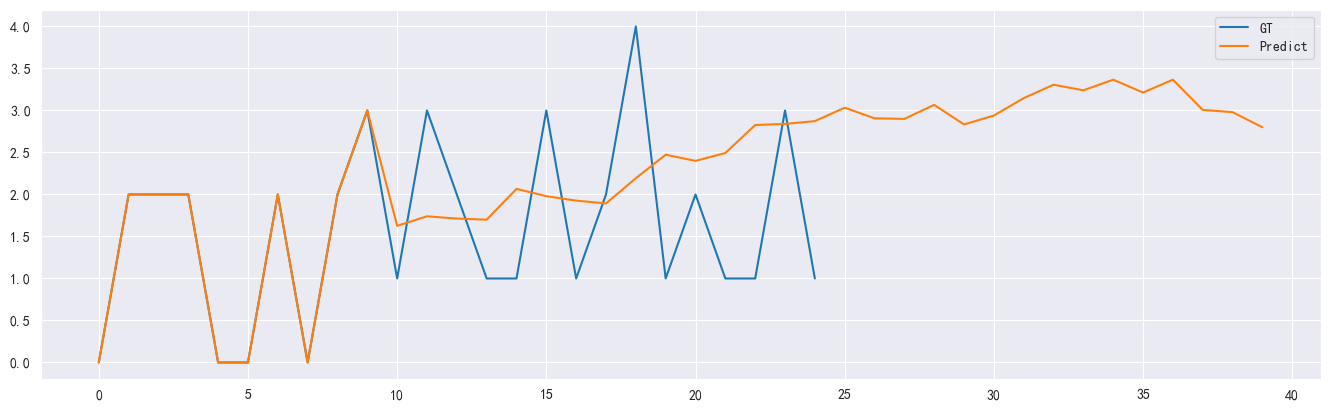

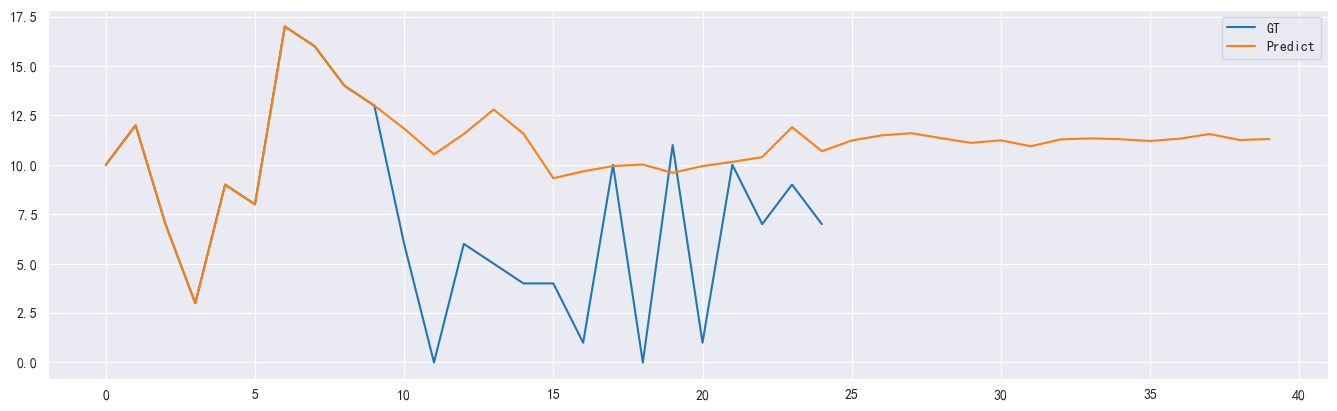

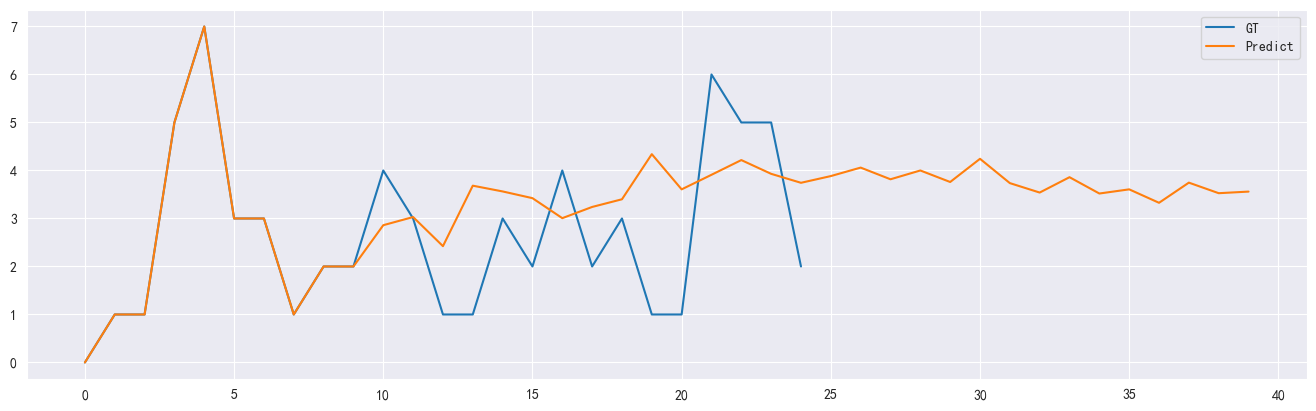

C Large 0.7048661126500462
A Large 0.6242273307790549
B Large 0.40094674556213017
B Medium -21.76
D Large 0.6906196581196582


ZeroDivisionError: float division by zero

In [30]:
TrainingProcess(ForestTrainingTable)

# 第一问预测

In [31]:
data2 = data.copy()[["seller_no","product_no","warehouse_no"]].drop_duplicates(keep='first').set_index("seller_no")
data2.head()

,product_no,warehouse_no
seller_no,,
seller_19,product_448,wh_30
seller_11,product_148,wh_1
seller_11,product_132,wh_16
seller_11,product_170,wh_9
seller_11,product_184,wh_18


In [32]:
data2.loc["seller_11"].groupby("warehouse_no").count()

,product_no
warehouse_no,
wh_1,71
wh_16,34
wh_17,11
wh_18,30
wh_19,12
wh_9,37


In [33]:
data3 = data.copy()[data["date"]>"2023-05-01"].set_index("product_no")
data3

,seller_no,warehouse_no,date,qty
product_no,,,,
product_448,seller_19,wh_30,2023-05-09,10
product_448,seller_19,wh_30,2023-05-12,4
product_448,seller_19,wh_30,2023-05-08,10
product_448,seller_19,wh_30,2023-05-06,9
product_448,seller_19,wh_30,2023-05-07,13
...,...,...,...,...
product_1015,seller_31,wh_52,2023-05-02,4
product_1015,seller_31,wh_52,2023-05-05,6
product_1015,seller_31,wh_52,2023-05-03,4


In [34]:
target = data3.reset_index()[["product_no", "seller_no","warehouse_no"]].drop_duplicates(keep='first')
target = target.set_index("seller_no").sort_index()
target

,product_no,warehouse_no
seller_no,,
seller_10,product_1931,wh_24
seller_10,product_528,wh_1
seller_10,product_1930,wh_13
seller_10,product_534,wh_1
seller_10,product_540,wh_1
...,...,...
seller_9,product_102,wh_13
seller_9,product_95,wh_1
seller_9,product_118,wh_13


In [35]:
Result = pd.DataFrame(columns=["seller_no","product_no","warehouse_no","date","qty"])
Result

predict_data = data[["product_no","warehouse_no","date","qty"]].set_index(["product_no","warehouse_no"]).sort_index()
predict_data["date"] = pd.to_datetime(predict_data["date"])
predict_data = predict_data[predict_data["date"]>="2023-04-20"] # 10+15 days before

count = 0
for seller_no, seller_data in target.reset_index().groupby("seller_no"):
    
    res_all = []
    unit = ForestTrainingTable[seller_type.loc[seller_no]["mixed type"]]
    
    print(f"    - {seller_no}包含{len(seller_data)}次预测")
    for index, tar in seller_data[["product_no","warehouse_no"]].iterrows():
        product = tar[0]
        wh = tar[1]

        single_series = predict_data.loc[(product, wh)].sort_values(by='date',ascending=True)
        
        single_series["mean 5"] = single_series["qty"].rolling(window=5).mean().fillna(0)
        single_series["std 5"] = single_series["qty"].rolling(window=5).std().fillna(0)
        single_series["mean 15"] = single_series["qty"].rolling(window=15).mean().fillna(0)
        single_series["std 15"] = single_series["qty"].rolling(window=15).std().fillna(0)
        single_series["min 15"] = single_series["qty"].rolling(window=15).min().fillna(0)
        single_series["max 15"] = single_series["qty"].rolling(window=15).max().fillna(0)
        single_series["d mean 5"] = single_series["mean 5"].diff().fillna(0)
        single_series["weekend"] = pd.Index(single_series["date"]).dayofweek.isin([5, 6])
        
        input_data = single_series[["qty","mean 5","std 5","mean 15","std 15","min 15","max 15","d mean 5","weekend"]].values
        input_data = input_data[-WINDOW:].reshape((1,WINDOW*FEATURES))
        
        predict, root = unit.long_term_predict(15, input_data, 1) # first day is Tuesday
        
        predict_series = predict[0][WINDOW:]
        res = {
            "seller_no" : seller_no,
            "product_no" : product,
            "warehouse_no" : wh,
            "date" : (single_series["date"][11:]+pd.Timedelta(days=15)).values,
            "qty" : predict_series
        }
        res_df = pd.DataFrame(res)
        res_all.append(res_df)

    count+=1
    Result = pd.concat([Result]+res_all, axis=0)
    print(f">>> 预测进度：{count}/{len(target.index.unique())}")
print(">>> 预测完毕")

    - seller_10包含48次预测
>>> 预测进度：1/35
    - seller_11包含195次预测
>>> 预测进度：2/35
    - seller_12包含174次预测
>>> 预测进度：3/35
    - seller_13包含7次预测
>>> 预测进度：4/35
    - seller_14包含126次预测
>>> 预测进度：5/35
    - seller_15包含117次预测
>>> 预测进度：6/35
    - seller_16包含57次预测
>>> 预测进度：7/35
    - seller_17包含15次预测
>>> 预测进度：8/35
    - seller_18包含2次预测
>>> 预测进度：9/35
    - seller_19包含14次预测
>>> 预测进度：10/35
    - seller_2包含42次预测
>>> 预测进度：11/35
    - seller_20包含14次预测
>>> 预测进度：12/35
    - seller_21包含77次预测
>>> 预测进度：13/35
    - seller_22包含39次预测
>>> 预测进度：14/35
    - seller_23包含59次预测
>>> 预测进度：15/35
    - seller_24包含66次预测
>>> 预测进度：16/35
    - seller_25包含63次预测
>>> 预测进度：17/35
    - seller_26包含25次预测
>>> 预测进度：18/35
    - seller_27包含59次预测
>>> 预测进度：19/35
    - seller_28包含147次预测
>>> 预测进度：20/35
    - seller_29包含36次预测
>>> 预测进度：21/35
    - seller_3包含12次预测
>>> 预测进度：22/35
    - seller_30包含28次预测
>>> 预测进度：23/35
    - seller_31包含41次预测
>>> 预测进度：24/35
    - seller_32包含106次预测
>>> 预测进度：25/35
    - seller_33包含93次预测
>>> 预测进度：26/35
    - seller_35包含22

In [36]:
Result

,seller_no,product_no,warehouse_no,date,qty
0,seller_10,product_1931,wh_24,2023-05-16,0.819598
1,seller_10,product_1931,wh_24,2023-05-17,1.447585
2,seller_10,product_1931,wh_24,2023-05-18,2.167092
3,seller_10,product_1931,wh_24,2023-05-19,1.34596
4,seller_10,product_1931,wh_24,2023-05-20,1.455632
...,...,...,...,...,...
10,seller_9,product_96,wh_1,2023-05-26,16.299712
11,seller_9,product_96,wh_1,2023-05-27,16.089371
12,seller_9,product_96,wh_1,2023-05-28,15.257553
13,seller_9,product_96,wh_1,2023-05-29,13.73129


In [37]:
import numpy as np

Result["date"] = pd.Index(pd.to_datetime(Result["date"])).strftime('%Y/%m/%d')
Result["qty"] = Result["qty"].astype('float').round()

In [38]:
Result.to_excel('result/result.xlsx', index=False)

In [39]:
import joblib

for t, unit in ForestTrainingTable.items():
    joblib.dump(unit.model, f"models/{t}_RF.pkl")
    
for t, unit in LinearTrainingTable.items():
    joblib.dump(unit.model, f"models/{t}_LR.pkl")